<a href="https://colab.research.google.com/github/a6iyyu/MachineLearning_3F_23/blob/main/JS13/TG1_2_3_JS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌺 Lab 1**

Klasifikasi Bunga Iris dengan Perceptron

### Langkah 1 - _Import Library_

In [80]:
from matplotlib.colors import ListedColormap

import kagglehub as kh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [81]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -O iris.csv

--2025-11-22 10:23:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.csv’

iris.csv                [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-11-22 10:23:40 (52.6 MB/s) - ‘iris.csv’ saved [4551]



### Langkah 2 - _Load_ Data dan Visualisasi

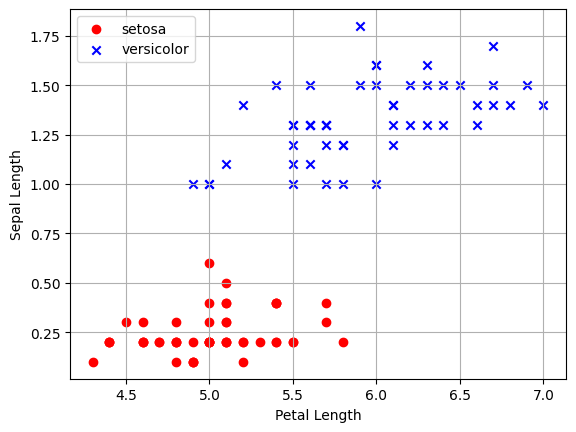

In [82]:
df = pd.read_csv('iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Langkah 3 - Membuat Kelas `Perceptron`

In [83]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Langkah 4 - Pilih Data dan _Encoding_ Label

In [84]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### Langkah 5 - _Fitting Model_

In [85]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

### Langkah 6 - Visualisasi Nilai _Error_ Per _Epoch_

Hasil visualisasi,


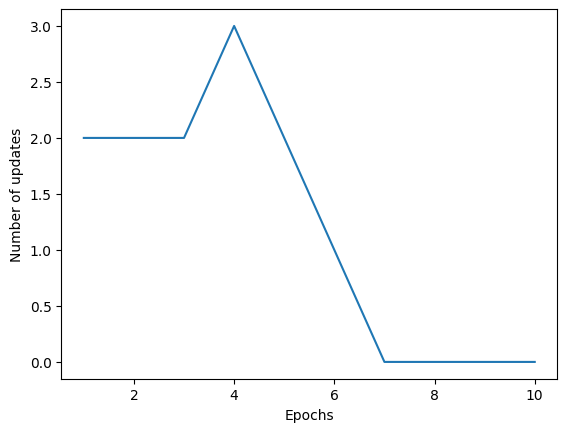

In [86]:
print('Hasil visualisasi,')
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Langkah 7 - Visualisasi _Decision Boundary_

In [87]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # Use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

/tmp/ipython-input-2686555799.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


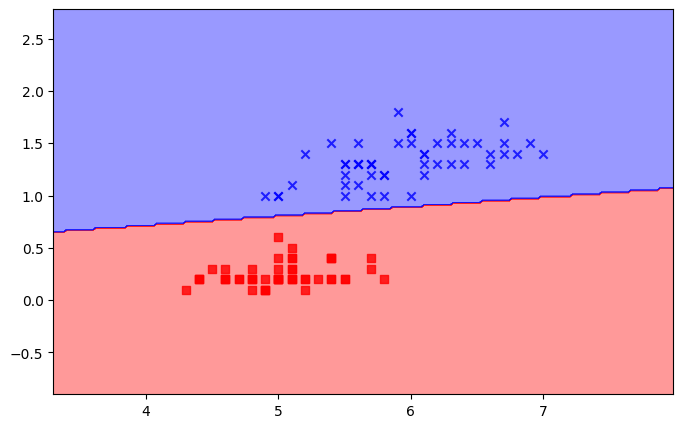

In [88]:
plt.figure(figsize=(8, 5))
plot_decision_regions(X, y, classifier=ppn)

# **🌸 Lab 2**

Nilai Logika XOR dengan MLP

### Langkah 1 - _Import Library_

In [89]:
from sklearn.neural_network import MLPClassifier

### Langkah 2 - Buat Data

In [90]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

### Langkah 3 - Fit Model

In [91]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

### Langkah 4 - Prediksi

In [92]:
pred = clf.predict(X)
print('Hasil,')
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Hasil,
Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# **🌼 Lab 3**

Klasifikasi Churn Rate dengan ANN

## Pra Pengolahan Data

### Langkah 1 - _Import Library_

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

import kagglehub
import numpy as np
import os
import pandas as pd
import shutil
import tensorflow as tf

In [94]:
path_cache = kagglehub.dataset_download("shrutimechlearn/churn-modelling")
files = os.listdir(path_cache)
csv_file = [f for f in files if 'Churn_Modelling' in f][0]
shutil.copy(os.path.join(path_cache, csv_file), 'Churn_Modelling.csv')

Using Colab cache for faster access to the 'churn-modelling' dataset.


'Churn_Modelling.csv'

### Langkah 2 - _Load_ Data

In [95]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print("Cek data (X)\n\n", X)

Cek data (X)

 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Langkah 3 - Encoding Data Kategorikal

In [96]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print('Cek data (X) dengan print. Hasilnya,\n\n', X)

Cek data (X) dengan print. Hasilnya,

 [[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [97]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print('Cek data (X) dengan print. Hasilnya,\n\n', X)

Cek data (X) dengan print. Hasilnya,

 [[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Langkah 5 - _Split_ Data

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Langkah 6 - _Scaling_ Fitur

In [99]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN

### Langkah 1 - Inisiasi Model ANN

In [100]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [101]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedua

In [102]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Langkah 4 - Membuat Output Layer

In [103]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training Model

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [104]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 2 - _Fitting Model_

In [105]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5872 - loss: 0.6756
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.4781
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.4438
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4342
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8046 - loss: 0.4327
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8060 - loss: 0.4268
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.4035
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.3944
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.3982
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.3947
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.3845
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Membuat Prediksi

Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: \$60000
- Number of Products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: \$50000

<br />

Apakah _customer_ tersebut perlu dipertahankan?

> Berdasarkan hasil prediksi model, nasabah tersebut diklasifikasikan tidak akan berhenti berlangganan (churn). Dengan demikian, nasabah ini tidak memerlukan strategi retensi khusus saat ini karena probabilitas loyalitasnya masih tergolong tinggi.

## Modelkan Data Baru dan Buat Prediksi

In [106]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[False]]


Hasil prediksi `False` mengindikasikan bahwa nasabah tersebut diproyeksikan akan tetap bertahan dan tidak berhenti berlangganan (_churn_). Oleh karena itu, nasabah ini tergolong setia dan tidak memerlukan strategi retensi atau penanganan khusus saat ini.

## Prediksi Dengan Data Testing

In [107]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Cek Akurasi dan _Confusion Matrix_

In [108]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 196  209]]


0.8595

# 🌻 Lab 4

Klasifikasi Siang dan Malang dengan ANN

### Langkah 1 - _Import Library_

_Import library_ yang dibutuhkan.

In [114]:
from google.colab import drive
from pathlib import Path
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

import cv2
import matplotlib.pyplot as plt
import numpy as np
import shutil
import tensorflow as tf

In [110]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
source_path = '/content/drive/MyDrive/Colab Notebooks/ML'
destination_path = '/content'

try:
    shutil.copytree(source_path, destination_path, dirs_exist_ok=True)
except Exception as e:
    raise e

### Langkah 2 - _Load Dataset_

Gunakan fungsi berikut dan _load dataset_. Pastikan direktori _dataset_ telah sesuai.

In [118]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for file in p.rglob('*.jpg'):
        label = file.parent.name
        img = cv2.imread(str(file))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))

    return img_list

train_dir = "training/"
test_dir  = "test/"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

### Langkah 3 - Pra Pengolahan

_Resize_ dan lakukan pelabelan data.

In [119]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

### Langkah 4 - Ekstraksi Fitur

Selanjutnya, lakukan proses ekstraksi fitur. Fitur yang akan digunakan adalah HoG.

In [120]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys', visualize=False, feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

### Langkah 5 - Standardisasi Fitur

In [121]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

### Langkah 6 - Buat Data Latih dan Validasi

In [122]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

### Langkah 7 - Buat Model ANN

Arsitektur model yang digunakan adalah,

- Input Layer
- Hidden Layer 1 - 128 Nodes - ReLU
- Hidden Layer 2 - 64 Nodes - ReLu
- Output Layer - 2 Nodes - Sigmoid

In [126]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("""
Anda akan mendapatkan summary dari arsitektur model. Informasi ini
penting untuk mengetahui bentuk dari arsitektur ANN dan jumlah parameter
yang dilatih.
""")

model.summary()


Anda akan mendapatkan summary dari arsitektur model. Informasi ini
penting untuk mengetahui bentuk dari arsitektur ANN dan jumlah parameter
yang dilatih.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

### Langkah 8 - Latih Model

Anda dapat mengakses ulang performansi model dengan menggunakan variabel history yang telah dibuat.

In [127]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.6575 - loss: 0.8725 - val_accuracy: 0.8958 - val_loss: 1.0706
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9804 - loss: 0.2666 - val_accuracy: 0.9375 - val_loss: 0.2826
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9583 - val_loss: 0.0732
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9970 - loss: 0.0672 - val_accuracy: 0.9583 - val_loss: 0.0717
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9792 - val_loss: 0.0297
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 2.2959e-04 - val_accuracy: 0.8958 - val_loss: 0.9655
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 2.3778e-04 - val_accuracy: 0.8750 - val_loss: 1.7908
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9965 - loss: 0.0127 - val_accuracy: 0.9583 - val_loss

### Langkah 9 - Evaluasi Model dengan Data Test

In [128]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9118 - loss: 0.5680
Akurasi Test: 0.8812500238418579


### Langkah 10 - Buat Laporan Performansi Model

In [129]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        80
           1       0.84      0.95      0.89        80

    accuracy                           0.88       160
   macro avg       0.89      0.88      0.88       160
weighted avg       0.89      0.88      0.88       160

[[65 15]
 [ 4 76]]


### Langkah 11 - Visualisasi Proses Training

Visualisasi ini penting untuk proses monitoring performa model. Visualisasi menggunakan konsep Receiver Operating Characteristic (ROC) untuk mengetahui performa model tiap epoch.

Hasilnya,



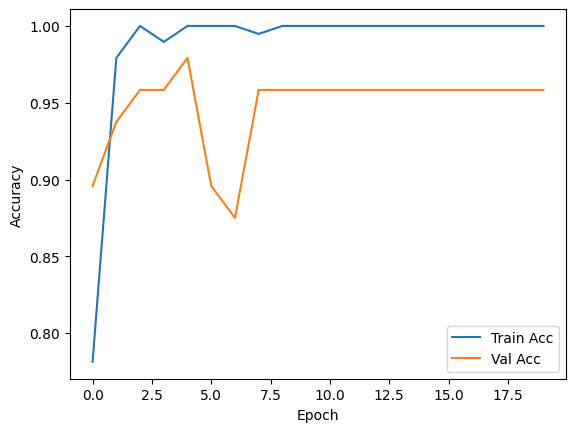

In [132]:
print('Hasilnya,\n')
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Langkah 11 - Simpan Model

Simpan model untuk kebutuhan produksi.

In [133]:
model.save('day_night_classifier_model.h5')

# **🌹 Tugas Lab**

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktivasi
- ANN diimplementasikan dengan menggunakan `tensorflow`.

In [134]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

### _Load Dataset_ dan Pra Pengolahan Data

In [135]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Arsitektur ANN

In [136]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Kompilasi Model

In [137]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Pelatihan Model

In [138]:
print("Mulai Pelatihan...")
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Mulai Pelatihan...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8804 - loss: 0.4121 - val_accuracy: 0.9645 - val_loss: 0.1172
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9680 - loss: 0.1024 - val_accuracy: 0.9700 - val_loss: 0.0959
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9792 - loss: 0.0656 - val_accuracy: 0.9754 - val_loss: 0.0810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0522 - val_accuracy: 0.9723 - val_loss: 0.0935
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0398 - val_accuracy: 0.9768 - val_loss: 0.0784


### Evaluasi

In [139]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAkurasi pada data tes: {test_acc*100:.2f}%')

313/313 - 1s - 2ms/step - accuracy: 0.9768 - loss: 0.0784

Akurasi pada data tes: 97.68%
